# Continuous Control Project (DDPG)
---
An DDPG agent to solve the Continuous Control Project as part of [Udacity's Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import math 
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from agent import Agent

from unityagents import UnityEnvironment

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below. Depending on the operating system, the ``REACHER_PATH`` to the Unity environment migth need to change.

In [2]:
REACHER_PATH = "Reacher20.app"

env = UnityEnvironment(file_name=REACHER_PATH, worker_id=1, seed=1) # Otherwise Unity crashes...
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name]

action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

states = env_info.vector_observations
state_size = states.shape[1]
num_agents = states.shape[0]

print('There are {} agents. Each observes a state with length: {}'.format(num_agents, state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of actions: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.98051071e+00 -1.00000000e+00
  5.58052063e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.48525572e-01]


### 3. Simplify the Interface of the Environment

The environment returns a ``BrainInfo`` object with attributes for the new state, the reward, and other information. The following helper function unpacks the values for ``next_state``, ``reward``, and ``done``.

In [3]:
def open_brain_surgery(brain):
    """Helper function to unpack BrainInfo Object.
    
    Params
    ======
        brain (BrainInfo) : Single BrainInfo Object
    """
    next_state = brain.vector_observations
    reward = brain.rewards
    done = brain.local_done
    return (next_state, reward, done)

### 4. Define the Training Function

The cell below trains the agent from scratch and saves the checkpoints when the environment is solved (score > 30).

In [4]:
def train(n_episodes=2000, max_t=1000, highscore=False):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        highscore (bool): If True training continues after the environment has been solved
    """
    max_score = 29                     # keep track of highest winning score
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        state, _, _ = open_brain_surgery(env.reset(train_mode=True)[brain_name])
        score = 0
        scores_agents = np.zeros(num_agents) 
        agent.reset()
        for t in range(max_t):
            action = agent.act(state)
            next_state, reward, done = open_brain_surgery(env.step(action)[brain_name])
            agent.step(state, action, reward, next_state, done)
            state = next_state
            scores_agents += reward
            if np.any(done):
                break 
        score = np.mean(scores_agents)    # calculate mean score over agents
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        avg_score = np.mean(scores_window)
        if i_episode % 1 == 0:          # report training progress
            print('\rEpisode {}\t Episode Score: {:.2f}, Average Score: {:.2f}'.format(i_episode, score, avg_score))
        if math.floor(avg_score)>max_score:
            if max_score == 29:           # environment solved (the average score is rounded down)
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\n'.format(i_episode-100, avg_score))
            else:                         # new high score achieved
                print('\nNew high score after {:d} episodes!\tAverage Score: {:.2f}\n'.format(i_episode-100, avg_score))
            max_score = math.floor(avg_score)
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_'+agent.flavor+'.pth')
            if not highscore:
                break
    return scores


def plot_scores(scores):
    """Plot Scores.
    
    Params
    ======
        scores (list): list of score for each episode
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

### 5. Train the Agents

In [5]:
# TODO: describe the Agent class

# TODO: train the agents

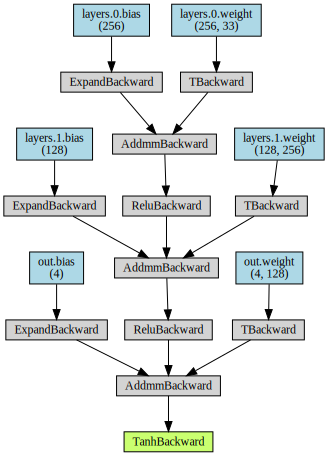

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, 
              random_seed=0, num_agents=num_agents, 
              hidden_sizes_actor=[256,128], hidden_sizes_critic=[128, 64, 32])
agent.show_actor_local()

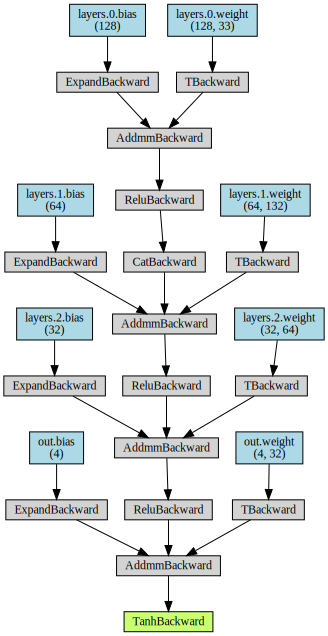

In [7]:
agent.show_critic_local()

In [8]:
scores = train()
plot_scores(scores)

Episode 1	Average Score: 0.82
Episode 2	Average Score: 0.64
Episode 3	Average Score: 0.58
Episode 4	Average Score: 0.57
Episode 5	Average Score: 0.61
Episode 6	Average Score: 0.66
Episode 7	Average Score: 0.67
Episode 8	Average Score: 0.70
Episode 9	Average Score: 0.74
Episode 10	Average Score: 0.78
Episode 11	Average Score: 0.82
Episode 12	Average Score: 0.89
Episode 13	Average Score: 0.96
Episode 14	Average Score: 1.04
Episode 15	Average Score: 1.16
Episode 16	Average Score: 1.28
Episode 17	Average Score: 1.43
Episode 18	Average Score: 1.58
Episode 19	Average Score: 1.74
Episode 20	Average Score: 1.88
Episode 21	Average Score: 2.03
Episode 22	Average Score: 2.22
Episode 23	Average Score: 2.39
Episode 24	Average Score: 2.54
Episode 25	Average Score: 2.71
Episode 26	Average Score: 2.86
Episode 27	Average Score: 2.99
Episode 28	Average Score: 3.09
Episode 29	Average Score: 3.22
Episode 30	Average Score: 3.37
Episode 31	Average Score: 3.52
Episode 32	Average Score: 3.63
Episode 33	Averag

ERROR:root:Exception calling application: Ran out of input
Traceback (most recent call last):
  File "/Users/czuend/anaconda3/envs/drlnd/lib/python3.6/site-packages/grpc/_server.py", line 385, in _call_behavior
    return behavior(argument, context), True
  File "/Users/czuend/anaconda3/envs/drlnd/lib/python3.6/site-packages/unityagents/rpc_communicator.py", line 26, in Exchange
    return self.child_conn.recv()
  File "/Users/czuend/anaconda3/envs/drlnd/lib/python3.6/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
EOFError: Ran out of input


KeyError: 'ReacherBrain'

### 6. Watch the Trained Agents

The next cell loads the checkpoint for a trained agent to watch it in action.

In [ ]:
# TODO: add watch_agent function

In [ ]:
env.close()

### 7. Possible Extensions

Performance and training speed could potentially be increased further:


In [ ]:
# TODO: add possible extensions